In [1]:
# App Reviews Sentiment Analysis
# App Reviews Sentiment Analysis means evaluating and understanding

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("C:\\Users\\ayush singh\\Desktop\\linkedin-reviews.csv")

In [6]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


### Exploratory Data Analysis
we will start by analyzing the distributionns of ratings. It will provide insights into the overall sentiment of the rewiews.Then we can explore further, such as analyzing the length of rewiws, and possibly derive insights from the text of the rewiews.

### plotting the Distribution of Ratings

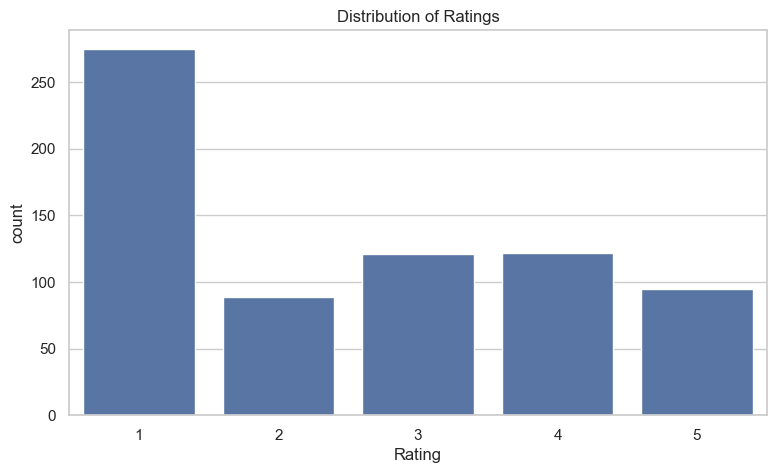

In [15]:
sns.set(style = 'whitegrid')
plt.figure(figsize =(9,5))
sns.countplot(data = df , x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

### adding sentiment labels in the data 
We will use Textblob library. Textblob provides a ploarity scores raning from -1(very negative) to 1(very positive) for a given text. We can use this score to classify each review's sentiment as positive, negative or neutral.

In [17]:
from textblob import TextBlob

In [19]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [20]:
df['sentiment'] = df ['Review'].apply(textblob_sentiment_analysis)

In [21]:
df.sample(5)

,Review,Rating,sentiment
9,Clean design with limited features. How about ...,3,Positive
201,needs app2sd. uninstall till then,1,Neutral
609,I actually use Linked In more.,4,Positive
248,Cannot load webpages in app or similar links,4,Neutral
436,Sooooo slow - have reverted to droidin,2,Negative


### Analyzing App Reviews Sentiments


In [23]:
sentiment_distribution = df['sentiment'].value_counts()
sentiment_distribution

sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

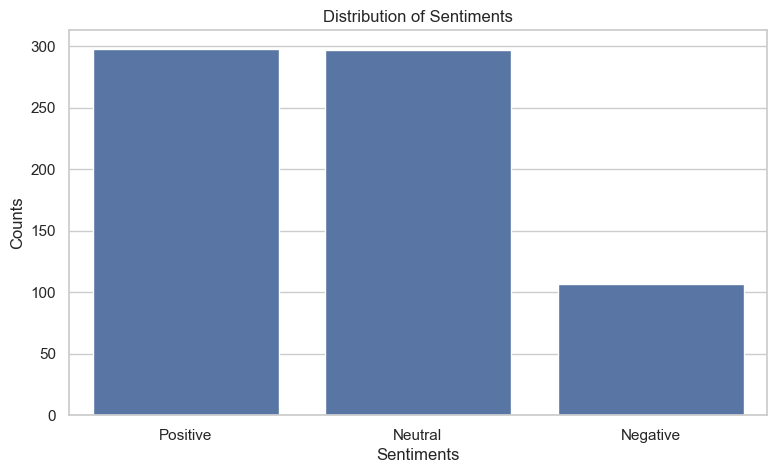

In [43]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
            y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

### so, we can see althrough the app has low ratings, still the reviewers don't use many negative words in the reviews for the app.
Next,we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is correlation between the sentiment of the text and numerical ratings.

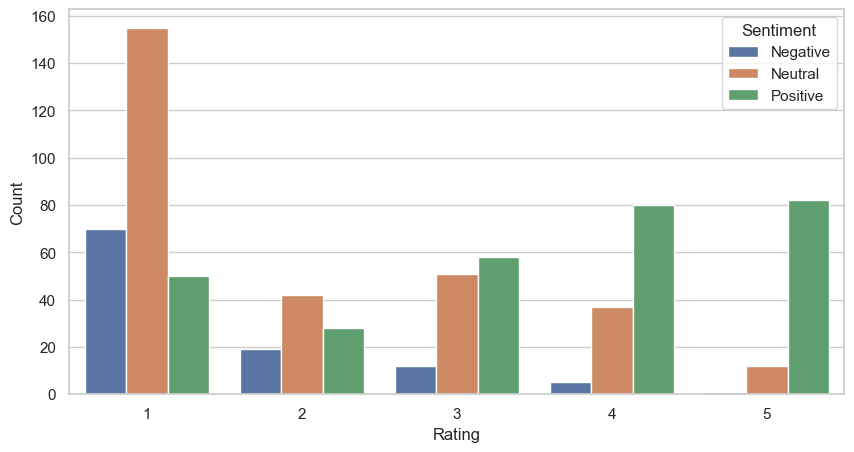

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data = df,
              x = 'Rating',
              hue ='sentiment')             
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()